In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("house_prices.csv")

df



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,N,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,N,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,N,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,N,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
from sklearn.preprocessing import LabelEncoder

df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S', errors='coerce')


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop(columns=['date'])
df['date'] = df['year']*10000 + df['month']*100 + df['day']
df = df.drop(columns=['year', 'month', 'day'])


df['waterfront'] = df['waterfront'].map({'Y': 1, 'N': 0}).fillna(0).astype(int)

le = LabelEncoder()
df['condition'] = le.fit_transform(df['condition'])









In [3]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int32  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int32  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,0.852450,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2.014390e+07
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.266543,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.436582e+03
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2.014050e+07
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2.014072e+07
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2.014102e+07
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,2.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2.015022e+07
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2.015053e+07


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'date'}>, <Axes: >, <Axes: >, <Axes: >,
       

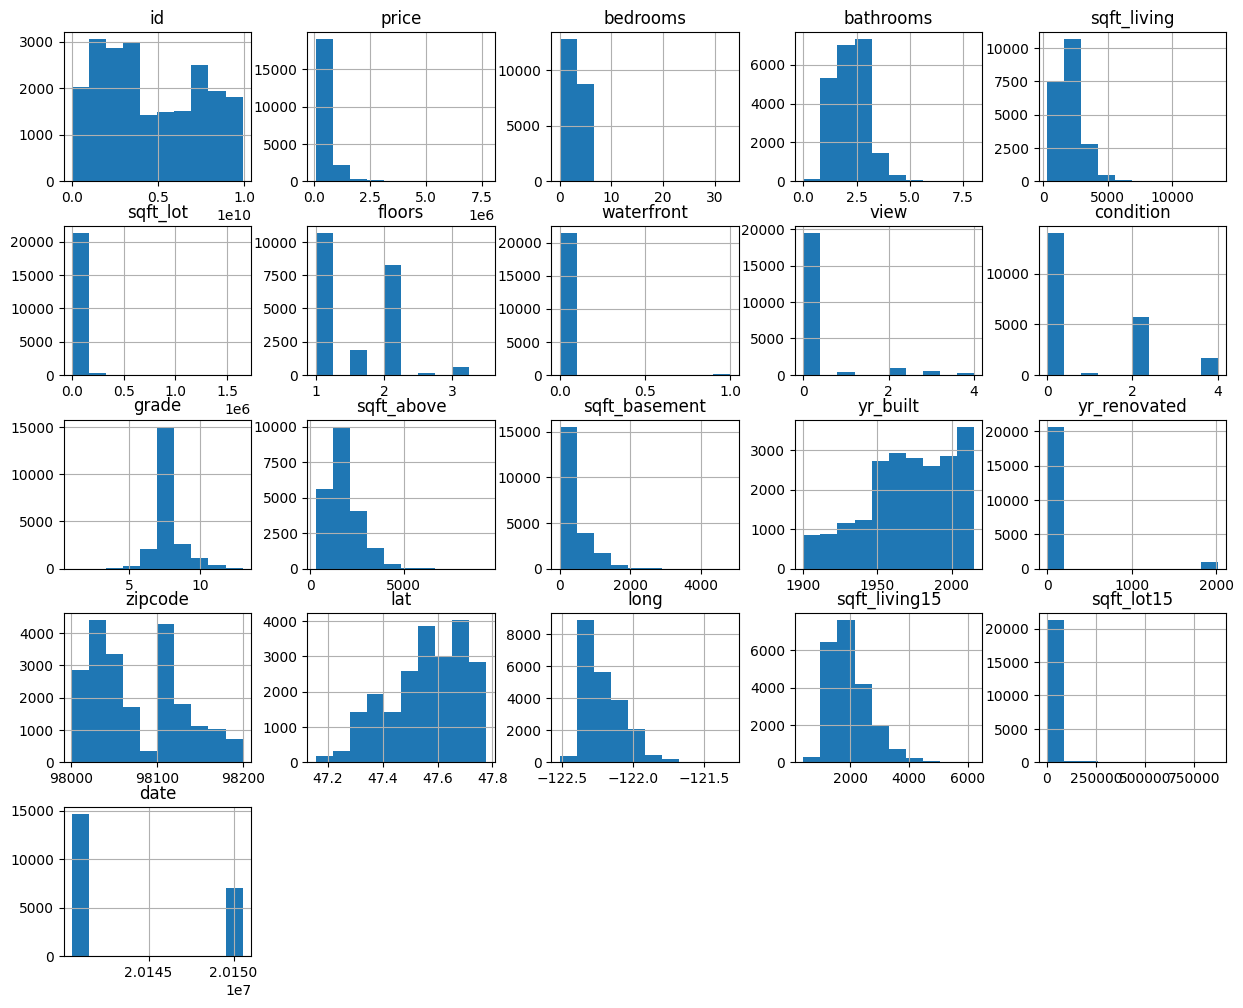

In [4]:
df.hist(figsize=(15, 12))




In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
train_data = X_train.join(y_train)

<Axes: >

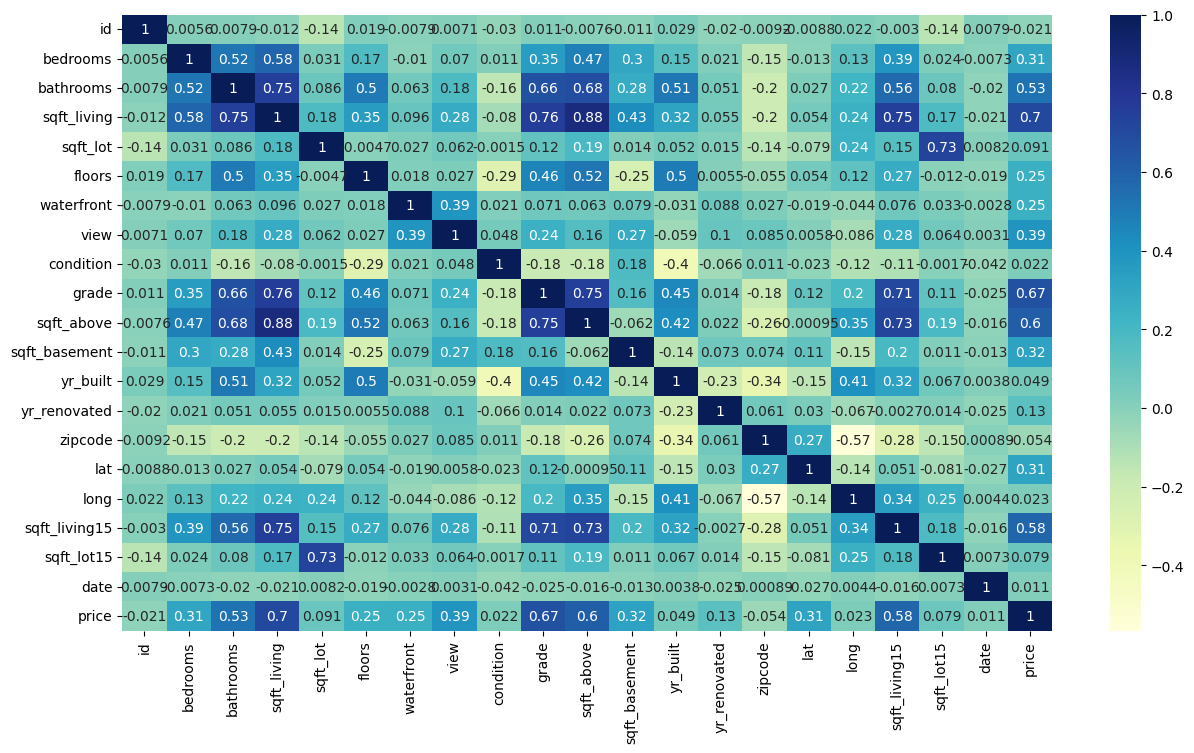

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [8]:
#SVM Support vector machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred_SVR = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred_SVR))

0.42532997894968944


In [9]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
Y_pred_RFR = model_RFR.predict(X_test)

mean_absolute_percentage_error(y_test, Y_pred_RFR)
print(f"Mean absolute error: {mean_absolute_percentage_error(y_test, Y_pred_RFR)}")
r2 = model_RFR.score(X_test, y_test)
print("Score del Random Forest:", r2)

Mean absolute error: 0.1398373852028574
Score del Random Forest: 0.8547985744448416


In [10]:
#Linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred_LR = model_LR.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred_LR))

0.24861889540511342


Entre los metodos seleccionados el mejor fue el Random Forest Regressor

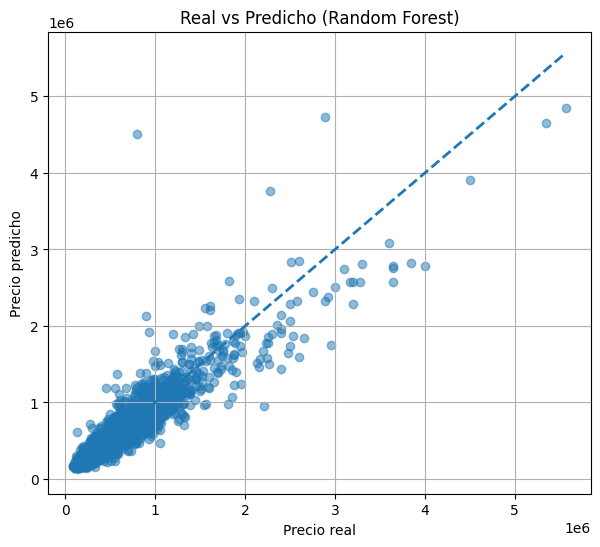

In [11]:

plt.figure(figsize=(7,6))
plt.scatter(y_test, Y_pred_RFR, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2)
plt.xlabel('Precio real'); plt.ylabel('Precio predicho')
plt.title('Real vs Predicho (Random Forest)')
plt.grid(True); plt.show()

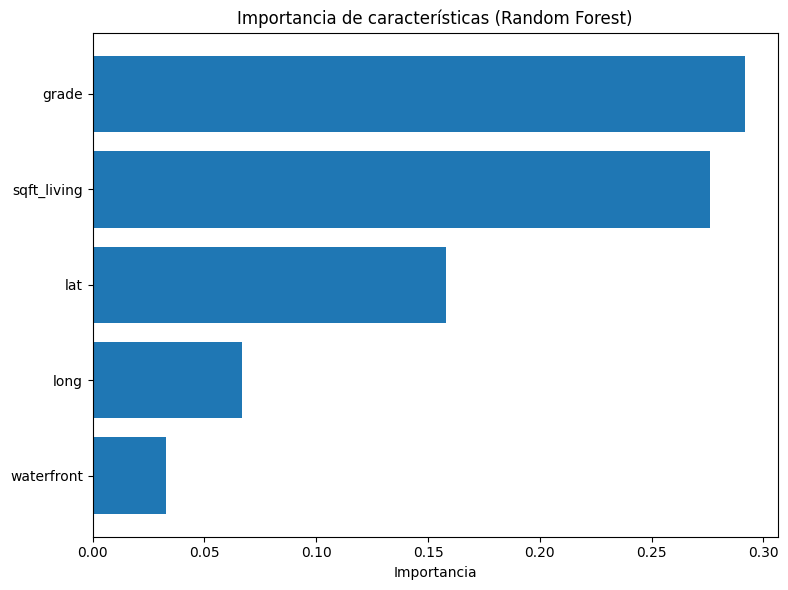

In [12]:
feat_importance = getattr(model_RFR, "feature_importances_", None)
if feat_importance is not None:
    idx = np.argsort(feat_importance)[::-1]
    top = 5  
    names = X_train.columns[idx][:top]
    vals  = feat_importance[idx][:top]

    plt.figure(figsize=(8,6))
    plt.barh(names[::-1], vals[::-1])
    plt.title('Importancia de características (Random Forest)')
    plt.xlabel('Importancia'); plt.tight_layout(); plt.show()

In [16]:
#Nuevas predicciones
def predecir_precio_casa(modelo, id_, bedrooms, bathrooms, sqft_living, sqft_lot, floors,
                         waterfront, view, condition, grade, sqft_above, sqft_basement,
                         yr_built, yr_renovated, zipcode, lat, long, sqft_living15,
                         sqft_lot15, date):

    data = pd.DataFrame([[
        id_, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view,
        condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated,
        zipcode, lat, long, sqft_living15, sqft_lot15, date
    ]], columns=[
        'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
        'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date'
    ])

    
    if hasattr(modelo, "feature_names_in_"):
        data = data.reindex(columns=list(modelo.feature_names_in_))

    
    prediccion = modelo.predict(data)[0]
    return prediccion





In [17]:
precio = predecir_precio_casa(
    model_RFR,
    id_=123456,
    bedrooms=3,
    bathrooms=2.5,
    sqft_living=2000,
    sqft_lot=5000,
    floors=2,
    waterfront=0,
    view=1,
    condition=3,
    grade=7,
    sqft_above=1800,
    sqft_basement=200,
    yr_built=1995,
    yr_renovated=0,
    zipcode=98052,
    lat=47.673,
    long=-122.121,
    sqft_living15=1900,
    sqft_lot15=6000,
    date=20140502
)

print(f" Precio estimado: ${precio:,.2f}")


 Precio estimado: $543,325.00
